In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import interpolate
from scipy.integrate import simps, romb, trapz
plt.rcParams.update({'font.size': 13})

In [2]:
def findexp_replace(folder,filename):
    logtmp=os.path.isfile("tmp")
    if logtmp==True:
        print(filename+" converted")
        return
    print("converting "+filename)
    os.system("cp "+folder+filename+" tmp")
    os.system("sed -i 's/ /  /g' tmp")
    os.system("sed -i 's/+/E+/g' tmp")
    os.system("sed -i 's/-/E-/g' tmp")
    os.system("sed -i 's/(/,/g' tmp")
    os.system("sed -i 's/)/,/g' tmp")
    for i in range(99):
        if i<10: os.system("sed -i 's/+0"+str(i)+"E/+0"+str(i)+" /g' tmp")
        if i<10: os.system("sed -i 's/-0"+str(i)+"E/-0"+str(i)+" /g' tmp")
        if i>=10: os.system("sed -i 's/+"+str(i)+"E/+"+str(i)+" /g' tmp")
        if i>=10: os.system("sed -i 's/-"+str(i)+"E/-"+str(i)+" /g' tmp")

In [3]:
def interp_omg(n,x,y,xnew,kind):
    if kind=="cubic": spline=interpolate.interp1d(x, y, kind=kind)
    if kind=="akima": spline=interpolate.Akima1DInterpolator(x,y)
    ynew=spline(xnew)
    return ynew

In [4]:
def nconfig(name):
    ncfg=0
    if (name=='2p6.3s2') or (name=='3S2'): ncfg=1
    if (name=='3s.3p') or (name=='3S1 3P1'): ncfg=2
    if (name=='3s.3d') or (name=='3S1 3D1'): ncfg=3
    if (name=='3s.4s') or (name=='3S1 4S1'): ncfg=4
    if (name=='3s.4p') or (name=='3S1 4P1'): ncfg=5
    if (name=='3s.4d') or (name=='3S1 4D1'): ncfg=6
    if (name=='3s.4f') or (name=='3S1 4F1'): ncfg=7
    if (name=='3s.5s') or (name=='3S1 5S1'): ncfg=8
    if (name=='3s.5p') or (name=='3S1 5P1'): ncfg=9
    if (name=='3s.5d') or (name=='3S1 5D1'): ncfg=10
    if (name=='3s.5f') or (name=='3S1 5F1'): ncfg=11
    if (name=='3s.5g') or (name=='3S1 5G1'): ncfg=12
    if (name=='3p2') or (name=='3P2'): ncfg=13
    if (name=='3s.6s') or (name=='3S1 6S1'): ncfg=14
    if (name=='3s.6p') or (name=='3S1 6P1'): ncfg=15
    if (name=='3s.6d') or (name=='3S1 6D1'): ncfg=16
    if (name=='3s.6f') or (name=='3S1 6F1'): ncfg=17
    if (name=='3s.6g') or (name=='3S1 6G1'): ncfg=18
    if (name=='3s.6h') or (name=='3S1 6H1'): ncfg=19
    if (name=='3s.7s') or (name=='3S1 7S1'): ncfg=20
    if (name=='3s.7p') or (name=='3S1 7P1'): ncfg=21
    if (name=='3s.7d') or (name=='3S1 7D1'): ncfg=22
    if (name=='3s.7f') or (name=='3S1 7F1'): ncfg=23
    if (name=='3s.7g') or (name=='3S1 7G1'): ncfg=24
    if (name=='3s.7h') or (name=='3S1 7H1'): ncfg=25
    if (name=='3s.7i') or (name=='3S1 7I1'): ncfg=26
    if (name=='3s.8s') or (name=='3S1 8S1'): ncfg=27
    if (name=='3s.8p') or (name=='3S1 8P1'): ncfg=28
    if (name=='3s.9s') or (name=='3S1 9S1'): ncfg=29    
    return ncfg

In [5]:
def map_BTspace(xener,eik,yomg,ntype):
    C=np.e
    xx=xener/eik
    if ntype==1:
        x=1-np.log(C)/np.log(xx+C)
        y=yomg/np.log(xx+np.e)
    if ntype==2:
        x=xx/(xx+C)
        y=yomg
    if ntype==3:
        x=xx/(xx+C)
        y=(xx+1)**2*yomg
    if ntype==4:
        x=1-np.log(C)/np.log(xx+C)
        y=yomg/np.log(xx+C)
    # include first point in BT-space
    lx=list(x)
    lx.insert(0,0)
    x=np.array(lx)
    ly=list(y)
    ly.insert(0,0)
    y=np.array(ly)
    # include last point in BT-space
    lx=list(x)
    xlast=0.99
#     if ntype==1: xlast=0.99
#     if ntype==3: xlast=0.99
    if lx[-1]>xlast: xlast=abs(lx[-1]-1.)/2.+lx[-1]
    lx.append(xlast)
    x=np.array(lx)
    if ntype==1 or ntype==4: ylast=abs(omg.loc[j][-2])
    if ntype==2 or ntype==3: ylast=y[-2]+(xlast-x[-2])/(x[-1]-x[-2])*(y[-1]-y[-2])
    ly=list(y)
    ly.append(ylast)
    y=np.array(ly)
    return x,y

In [6]:
def mapback_BTspace(ntype,eik,x_new,y_new):
    C=np.e
    if ntype==1:
        arg=np.log(C)/(1.-x_new)
        enerp=(np.exp(arg)-C)*eik
        omgp=y_new*np.log(enerp/eik+np.e)
    if ntype==2:
        enerp=x_new/(1.-x_new)*C*eik
        omgp=y_new
    if ntype==3:
        enerp=x_new*C/(1.-x_new)*eik
        omgp=y_new/(enerp/eik+1)**2
    if ntype==4:
        arg=np.log(C)/(1.-x_new)
        enerp=(np.exp(arg)-C)*eik
        omgp=y_new*np.log(enerp/eik+C)
    omgp[omgp < 0.] = 0.
#     nmax=npts-1
    nmax=len([i for i in enerp if i < 10.])
    enerpp=enerp[:nmax]
    omgpp=omgp[:nmax]
    return enerpp,omgpp

In [7]:
def data_trans(j,omg,levels):
    k=int(omg.loc[j]['k'])
    i=int(omg.loc[j]['i'])
    Aki=omg.loc[j]['aki']
    jk=levels.loc[k]['J']
    ji=levels.loc[i]['J']
    gk=2*jk+1
    gi=2*ji+1
    ek=levels.loc[k]['E']
    ei=levels.loc[i]['E']
    eik=abs(ek-ei)
    fik=0
    if eik!=0: 
        S=3.73491E-10*gk*Aki/eik**3
        fik=eik*S/(3.*gi)
    return Aki,gk,gi,eik,fik

In [8]:
def compute_ECS(enerpp,omgpp,ups_new):
    global ntemp,T,kB,convRyd2eV
    yups=[]
    for i in range(ntemp):
        kBT=kB*T[i]
        arg=enerpp*convRyd2eV/kBT
        yint=omgpp*np.exp(-arg)
        I1=simps(yint, arg)
        yups.append(I1)
        ups_new.loc[j,str(T[i])]=I1
    return yups

In [9]:
def plot_om2ups(xener,yomg,enerpp,omgpp,x,y,x_new,y_new,T,ups):
    fig=plt.figure(figsize=(15,5))
    ax1=plt.subplot(131)
    plt.plot(xener,yomg,'o-')
    plt.plot(enerpp,omgpp,'r-')
    ax2=plt.subplot(132)
    plt.plot(x,y,'o-')
    plt.plot(x_new,y_new,'r-')
    ax3=plt.subplot(133)
#     plt.plot(T,ups_prev.loc[0][3:-1],'k',label="adas")
    plt.plot(T,yups,'g-',label="present")
    plt.legend(loc='upper left',bbox_to_anchor=[1,1],fontsize=15,ncol=1)
    plt.show()

# Define final scattered electron energy and temperatures

In [10]:
global ntemp,T,kB,convRyd2eV,npts,ntran

In [11]:
kB=8.6173324E-05 # eV/K
convRyd2eV=13.6057 # eV/Ryd
convcm2Ryd=1./109737.26 

In [12]:
ener=[1.00E-02,2.20E-01,4.89E-01,8.17E-01,1.22E+00,
      1.71E+00,2.30E+00,3.03E+00,3.92E+00,5.00E+00]
T=[3.0E+03,4.0E+03,5.0E+03,6.0E+03,7.0E+03,8.0E+03,9.0E+03,
   1.0E+04,1.1E+04,1.2E+04,1.3E+04,1.4E+04,1.5E+04,1.6E+04]

In [13]:
nener=len(ener)
ntemp=len(T)
ntran=3175
nlevels=90
npts=2**13+1

In [14]:
folder="./"
file_om="adf04_om"
file_ups="adf04_ups"

# Load level data and transitions collision strength:

In [295]:
findexp_replace(folder,file_om)

In [296]:
levels=pd.read_csv("tmp",header=None,skiprows=[0],nrows=nlevels,usecols=[0,1,2,3,4])
colsname=['CFG','S','L','J','E']
levels.columns=colsname
for j in range(nlevels):
    s=levels.loc[j]['CFG']
    sn=" ".join(s.split()[1:])
    levels.at[j,'CFG']=sn
levels.index=levels.index+1
levels['E']=levels['E']*convcm2Ryd

In [297]:
omgcols=[i for i in range(nener+4)]
omg=pd.read_csv("tmp",sep="\s+",header=None,skiprows=93,nrows=ntran,usecols=omgcols)
colsname= ['k','i','aki']
for i in range(nener):
    colsname.append(str(ener[i]))
colsname.append("inf")
omg.columns=colsname

In [300]:
levels.head()

,CFG,S,L,J,E
1,3S2,1,0,0.0,0.000000
2,3S1 3P1,3,1,4.0,0.173051
3,3S1 3P1,1,1,1.0,0.336431
4,3S1 4S1,3,0,1.0,0.346630
5,3S1 4S1,1,0,0.0,0.383369


In [19]:
omg.head()

,k,i,aki,0.01,0.22,0.489,0.817,1.22,1.71,2.3,3.03,3.92,5.0,inf
0,2,1,1.000000e-30,1.52,6.45,4.670,2.450,1.1600,0.5780,0.3140,0.1870,0.11500,0.07240,0.0
1,3,1,4.280000e+08,3.14,8.18,14.900,22.000,28.8000,34.6000,40.4000,45.6000,50.60000,55.50000,-19.6
2,3,2,1.000000e-30,11.90,11.80,4.350,1.770,0.7680,0.3700,0.1970,0.1140,0.06830,0.04190,0.0
3,4,1,1.000000e-30,1.06,1.18,0.385,0.199,0.0892,0.0409,0.0216,0.0128,0.00795,0.00501,0.0
4,4,2,9.750000e+07,11.80,27.10,29.600,43.700,41.5000,59.5000,55.2000,63.5000,72.00000,80.40000,-26.8


# Sort type of transition

In [20]:
fbig=0.01
fzero=1.0E-04

In [21]:
ntype=[]
for j in range(ntran):
    k=int(omg.loc[j]['k'])
    i=int(omg.loc[j]['i'])
    Aki=omg.loc[j]['aki']
    jk=levels.loc[k]['J']
    ji=levels.loc[i]['J']
    gk=2*jk+1
    gi=2*ji+1
    ek=levels.loc[k]['E']
    ei=levels.loc[i]['E']
    eik=abs(ek-ei)
    if eik==0: eik=0.00001
    S=3.73491E-10*gk*Aki/eik**3
    fij=eik*S/(3.*gi)
    if levels.loc[k]['S']==levels.loc[i]['S']:
        if (abs(levels.loc[k]['L']-levels.loc[i]['L'])<=1) & (fij>=fbig):
            ntype.append(1)
        else:
            if (fij>fzero) & (fij<fbig):
                ntype.append(4)
            else:
                ntype.append(2)
    else:
        if (fij>fzero) & (fij<fbig):
            ntype.append(4)
        else:
            ntype.append(3)
        #ntype.append(3)
omg['type']=ntype

In [22]:
omg.head()

,k,i,aki,0.01,0.22,0.489,0.817,1.22,1.71,2.3,3.03,3.92,5.0,inf,type
0,2,1,1.000000e-30,1.52,6.45,4.670,2.450,1.1600,0.5780,0.3140,0.1870,0.11500,0.07240,0.0,3
1,3,1,4.280000e+08,3.14,8.18,14.900,22.000,28.8000,34.6000,40.4000,45.6000,50.60000,55.50000,-19.6,1
2,3,2,1.000000e-30,11.90,11.80,4.350,1.770,0.7680,0.3700,0.1970,0.1140,0.06830,0.04190,0.0,3
3,4,1,1.000000e-30,1.06,1.18,0.385,0.199,0.0892,0.0409,0.0216,0.0128,0.00795,0.00501,0.0,3
4,4,2,9.750000e+07,11.80,27.10,29.600,43.700,41.5000,59.5000,55.2000,63.5000,72.00000,80.40000,-26.8,1


# Insert database info

In [23]:
mod_levels=pd.read_csv("ModelAtomicIonLevel.txt",sep="\s+",header='infer',nrows=55,usecols=[3,6,7,8,9,11,12])
mod_levels.rename(columns={'2S':'S'},inplace=True)
mod_levels['S']=mod_levels['S']+1
mod_levels['ExcitationWaven']=mod_levels['ExcitationWaven']*convcm2Ryd
nmodlev=len(mod_levels.index)

In [24]:
mod_levels.tail()

,LevelNumber,ElectronConfig,Term,S,L,LevelWeight,ExcitationWaven
50,51,3s.7h,3H*,3,5,33,0.541556
51,52,3s.7h,1H*,1,5,11,0.541556
52,53,3s.7i,3I,3,6,39,0.541571
53,54,3s.7i,1I,1,6,13,0.541571
54,55,3s.9s,3S,3,0,3,0.543563


# Burgess and Tully interpolation + effective collision strength calculation:

In [25]:
ups=omg.copy()
enercols=[str(ener[i]) for i in range(nener)]
tmpcols=[str(T[i]) for i in range(ntemp)]
enercols.append("type")
ups.drop(enercols, axis=1, inplace=True)
tmp=[0 for i in range(ntran)]
for i in range(ntemp):
    ii=i+3
    ups.insert(ii,tmpcols[i], tmp)

In [26]:
ups.head()

,k,i,aki,3000.0,4000.0,5000.0,6000.0,7000.0,8000.0,9000.0,10000.0,11000.0,12000.0,13000.0,14000.0,15000.0,16000.0,inf
0,2,1,1.000000e-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,3,1,4.280000e+08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-19.6
2,3,2,1.000000e-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,4,1,1.000000e-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,4,2,9.750000e+07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-26.8


# Change type of some transition for better mapping

In [27]:
ntype2=[34,77,132]
for i in ntype2:
    omg.at[i,'type']=2

In [28]:
ntype4=[5,9,19,20,25,26,35,44,45,54,64,76,88,89,90,
        101,102,117,118,119,133,134,151,152,170,
        208,209,228,229,230,249,250,271,272,249,
        296,297,298,299,320,321,322,323,344,345,
        345,346,347,376,404,462,463,492,493,494,
        523,524,525,555,556,588,589,592,624,625,
        626,627,628,659,660,661,662,663,694,695,
        696,697,698,699,730,731,732,733,734,766,
        773,774,775,776,816,846,845,846,847,848,
        849,850,851,856,893,894,895,896,898,899,
        935,936,937,938,940,942,983,984,
        1015,1016,1022,1021,1022,1023,1024,1025,1027,1028,
        1067,1068,1069,1070,1072,1073,1075,1076,1113,1114,
        1115,1116,1118,1119,1120,1121,1122,1123,1155,1159,
        1164,1167,1168,1169,1170,1171,1172,1203,1204,1205,
        1206,1207,1212,1215,1216,1217,1218,1219,1220,1251,
        1252,1253,1254,1255,1260,1263,1264,1265,1266,1267,
        1268,1269,1300,1301,1302,1303,1304,1309,1312,1313,
        1314,1315,1316,1317,1318,1319,1363,1364,1365,1366,
        1367,1408,1412,1413,1420,1421,1422,1423,1424,1469,
        1470,1471,1472,1477,1478,1518,1521,1522,1523,1524,
        1525,1526,1532,1582,1583,1584,1585,1586,1588,1589,
        1626,1631,1638,1639,1640,1641,1642,1644,1645,1688,
        1695,1696,1697,1698,1699,1701,1702,1746,1753,1754,
        1755,1756,1757,1759,1760,1804,1805,1812,1813,1814,
        1815,1816,1818,1819,1822,1854,1855,1856,1857,1858,
        1863,1866,1868,1869,1870,1871,1877,1880,1881,1882,
        1883,1884,1824,1927,1928,1929,1930,1931,1932,1938,
        1941,1942,1943,1944,1945,1976,1977,1978,1979,1980,
        1988,1989,1990,1991,1992,1993,1999,2002,2003,2004,
        2005,2006,2007,2022,2021,2022,2023,2024,2025,2026,
        2027,2028,2029,2030,2073,2074,2075,2076,2077,2078,
        2084,2087,2088,2089,2090,2091,2095,2144,2145,2146,
        2147,2148,2150,2151,2157,2158,2159,2160,2207,2208,
        2214,2217,2218,2219,2220,2221,2225,2227,2284,2285,
        2286,2287,2288,2292,2294,2295,2357,2358,2359,2360,
        2362,2363,2412,2413,2414,2415,2419,2425,2426,2427,
        2429,2431,2432,2482,2483,2484,2485,2486,2488,2495,
        2496,2497,2498,2500,2501,2552,2553,2254,2255,2256,
        2558,2559,2565,2566,2567,2568,2570,2571,2572,2573,
        2610,2613,2615,2616,2623,2624,2625,2627,2629,2630,
        2636,2637,2638,2639,2641,2642,2643,2644,2645,2682,
        2683,2684,2685,2687,2688,2695,2696,2697,2698,2699,
        2701,2702,2708,2709,2710,2711,2713,2714,2715,2716,
        2717,2718,2768,2769,2770,2771,2772,2774,2775,2781,
        2782,2783,2784,2786,2787,2788,2789,2790,2791,2792,
        2836,2837,2838,2839,2840,2841,2847,2850,2851,2852,
        2853,2854,2859,2862,2863,2864,2865,2866,2911,2912,
        2913,2914,2915,2916,2922,2925,2926,2927,2928,2929,
        2934,2937,2938,2939,2940,2941,2986,2987,2988,2990,
        2991,3000,3001,3002,3003,3004,3009,3012,3013,3014,
        3015,3016,3017,3018,3019,3062,3063,3064,3065,3066,
        3067,3073,3076,3077,3078,3079,3080,3085,3088,3089,
        3090,3091,3092,3093,3094,3095,3096,3139,3140,3141,
        3142,3143,3144,3150,3151,3152,3153,3155,3156,3157,
        3162,3165,3166,3167,3168,3169,3170,3171,3172,3173,
        3174]
for i in ntype4:
    omg.at[i,'type']=4

In [29]:
for j in range(ntran):
    ntype=int(omg.loc[j]['type'])
    print("j=",j,"type=",ntype)
    Aki,gk,gi,eik,fik=data_trans(j,omg,levels)
    if eik==0: 
        continue
    # copy data into aux variables
    yomg=omg.loc[j][3:-2].values
    yomg[yomg < 0.] = 0.
    xener=np.array(ener)
    # map into BT-space
    x,y=map_BTspace(xener,eik,yomg,ntype)
    # make spline of x y in BT-space
    nx=len(x)
    x_new=np.linspace(x[0],x[nx-1], npts)
    y_new=interp_omg(nx,x,y,x_new,'akima')
    # mapping back from BT-space
    enerpp,omgpp=mapback_BTspace(ntype,eik,x_new,y_new)
    # compute effective collision strength
    yups=compute_ECS(enerpp,omgpp,ups)
    # plot and check data
    iplot=0
    if iplot==1:
        plot_om2ups(xener,yomg,enerpp,omgpp,x,y,x_new,y_new,T,ups)

j= 0 type= 3
j= 1 type= 1
j= 2 type= 3
j= 3 type= 3
j= 4 type= 1
j= 5 type= 4
j= 6 type= 2
j= 7 type= 3
j= 8 type= 1
j= 9 type= 4
j= 10 type= 2
j= 11 type= 3
j= 12 type= 1
j= 13 type= 3
j= 14 type= 2
j= 15 type= 3
j= 16 type= 2
j= 17 type= 3
j= 18 type= 1
j= 19 type= 4
j= 20 type= 4
j= 21 type= 3
j= 22 type= 1
j= 23 type= 3
j= 24 type= 2
j= 25 type= 4
j= 26 type= 4
j= 27 type= 4
j= 28 type= 1
j= 29 type= 3
j= 30 type= 2
j= 31 type= 3
j= 32 type= 1
j= 33 type= 1
j= 34 type= 2
j= 35 type= 4
j= 36 type= 3
j= 37 type= 1
j= 38 type= 3
j= 39 type= 2
j= 40 type= 3
j= 41 type= 3
j= 42 type= 1
j= 43 type= 2
j= 44 type= 4
j= 45 type= 4
j= 46 type= 3
j= 47 type= 1
j= 48 type= 3
j= 49 type= 2
j= 50 type= 2
j= 51 type= 3
j= 52 type= 3
j= 53 type= 1
j= 54 type= 4
j= 55 type= 2
j= 56 type= 3
j= 57 type= 1
j= 58 type= 3
j= 59 type= 2
j= 60 type= 2
j= 61 type= 3
j= 62 type= 3
j= 63 type= 1
j= 64 type= 4
j= 65 type= 2
j= 66 type= 3
j= 67 type= 1
j= 68 type= 3
j= 69 type= 2
j= 70 type= 3
j= 71 type= 3
j=

j= 564 type= 3
j= 565 type= 3
j= 566 type= 2
j= 567 type= 2
j= 568 type= 3
j= 569 type= 2
j= 570 type= 3
j= 571 type= 3
j= 572 type= 2
j= 573 type= 2
j= 574 type= 2
j= 575 type= 3
j= 576 type= 3
j= 577 type= 2
j= 578 type= 3
j= 579 type= 3
j= 580 type= 2
j= 581 type= 2
j= 582 type= 2
j= 583 type= 1
j= 584 type= 3
j= 585 type= 3
j= 586 type= 3
j= 587 type= 2
j= 588 type= 4
j= 589 type= 4
j= 590 type= 2
j= 591 type= 2
j= 592 type= 4
j= 593 type= 1
j= 594 type= 2
j= 595 type= 3
j= 596 type= 2
j= 597 type= 3
j= 598 type= 2
j= 599 type= 2
j= 600 type= 3
j= 601 type= 3
j= 602 type= 2
j= 603 type= 3
j= 604 type= 2
j= 605 type= 2
j= 606 type= 3
j= 607 type= 3
j= 608 type= 3
j= 609 type= 2
j= 610 type= 2
j= 611 type= 3
j= 612 type= 2
j= 613 type= 2
j= 614 type= 3
j= 615 type= 3
j= 616 type= 3
j= 617 type= 3
j= 618 type= 1
j= 619 type= 2
j= 620 type= 2
j= 621 type= 3
j= 622 type= 2
j= 623 type= 2
j= 624 type= 4
j= 625 type= 4
j= 626 type= 4
j= 627 type= 4
j= 628 type= 4
j= 629 type= 2
j= 630 typ

j= 1104 type= 3
j= 1105 type= 2
j= 1106 type= 3
j= 1107 type= 3
j= 1108 type= 2
j= 1109 type= 2
j= 1110 type= 2
j= 1111 type= 2
j= 1112 type= 1
j= 1113 type= 4
j= 1114 type= 4
j= 1115 type= 4
j= 1116 type= 4
j= 1117 type= 2
j= 1118 type= 4
j= 1119 type= 4
j= 1120 type= 4
j= 1121 type= 4
j= 1122 type= 4
j= 1123 type= 4
j= 1124 type= 1
j= 1125 type= 2
j= 1126 type= 3
j= 1127 type= 2
j= 1128 type= 3
j= 1129 type= 2
j= 1130 type= 2
j= 1131 type= 3
j= 1132 type= 3
j= 1133 type= 2
j= 1134 type= 3
j= 1135 type= 2
j= 1136 type= 2
j= 1137 type= 3
j= 1138 type= 3
j= 1139 type= 3
j= 1140 type= 2
j= 1141 type= 2
j= 1142 type= 3
j= 1143 type= 2
j= 1144 type= 2
j= 1145 type= 3
j= 1146 type= 3
j= 1147 type= 3
j= 1148 type= 3
j= 1149 type= 2
j= 1150 type= 2
j= 1151 type= 2
j= 1152 type= 3
j= 1153 type= 2
j= 1154 type= 2
j= 1155 type= 4
j= 1156 type= 3
j= 1157 type= 3
j= 1158 type= 3
j= 1159 type= 4
j= 1160 type= 1
j= 1161 type= 2
j= 1162 type= 2
j= 1163 type= 2
j= 1164 type= 4
j= 1165 type= 2
j= 1166 

j= 1635 type= 2
j= 1636 type= 2
j= 1637 type= 2
j= 1638 type= 4
j= 1639 type= 4
j= 1640 type= 4
j= 1641 type= 4
j= 1642 type= 4
j= 1643 type= 1
j= 1644 type= 4
j= 1645 type= 4
j= 1646 type= 1
j= 1647 type= 3
j= 1648 type= 2
j= 1649 type= 3
j= 1650 type= 2
j= 1651 type= 3
j= 1652 type= 3
j= 1653 type= 2
j= 1654 type= 1
j= 1655 type= 3
j= 1656 type= 2
j= 1657 type= 3
j= 1658 type= 3
j= 1659 type= 1
j= 1660 type= 2
j= 1661 type= 2
j= 1662 type= 3
j= 1663 type= 3
j= 1664 type= 2
j= 1665 type= 3
j= 1666 type= 3
j= 1667 type= 1
j= 1668 type= 2
j= 1669 type= 2
j= 1670 type= 4
j= 1671 type= 3
j= 1672 type= 3
j= 1673 type= 3
j= 1674 type= 2
j= 1675 type= 3
j= 1676 type= 3
j= 1677 type= 1
j= 1678 type= 2
j= 1679 type= 2
j= 1680 type= 4
j= 1681 type= 2
j= 1682 type= 3
j= 1683 type= 3
j= 1684 type= 3
j= 1685 type= 3
j= 1686 type= 2
j= 1687 type= 3
j= 1688 type= 4
j= 1689 type= 1
j= 1690 type= 2
j= 1691 type= 2
j= 1692 type= 1
j= 1693 type= 2
j= 1694 type= 2
j= 1695 type= 4
j= 1696 type= 4
j= 1697 

j= 2151 type= 4
j= 2152 type= 2
j= 2153 type= 1
j= 2154 type= 2
j= 2155 type= 2
j= 2156 type= 2
j= 2157 type= 4
j= 2158 type= 4
j= 2159 type= 4
j= 2160 type= 4
j= 2161 type= 2
j= 2162 type= 3
j= 2163 type= 4
j= 2164 type= 3
j= 2165 type= 2
j= 2166 type= 2
j= 2167 type= 3
j= 2168 type= 3
j= 2169 type= 4
j= 2170 type= 3
j= 2171 type= 2
j= 2172 type= 2
j= 2173 type= 3
j= 2174 type= 3
j= 2175 type= 3
j= 2176 type= 2
j= 2177 type= 4
j= 2178 type= 3
j= 2179 type= 2
j= 2180 type= 2
j= 2181 type= 3
j= 2182 type= 3
j= 2183 type= 3
j= 2184 type= 3
j= 2185 type= 2
j= 2186 type= 2
j= 2187 type= 1
j= 2188 type= 3
j= 2189 type= 2
j= 2190 type= 2
j= 2191 type= 3
j= 2192 type= 3
j= 2193 type= 3
j= 2194 type= 3
j= 2195 type= 3
j= 2196 type= 2
j= 2197 type= 2
j= 2198 type= 2
j= 2199 type= 1
j= 2200 type= 3
j= 2201 type= 2
j= 2202 type= 2
j= 2203 type= 3
j= 2204 type= 3
j= 2205 type= 3
j= 2206 type= 3
j= 2207 type= 4
j= 2208 type= 4
j= 2209 type= 2
j= 2210 type= 2
j= 2211 type= 2
j= 2212 type= 2
j= 2213 

j= 2681 type= 1
j= 2682 type= 4
j= 2683 type= 4
j= 2684 type= 4
j= 2685 type= 4
j= 2686 type= 2
j= 2687 type= 4
j= 2688 type= 4
j= 2689 type= 2
j= 2690 type= 2
j= 2691 type= 2
j= 2692 type= 2
j= 2693 type= 1
j= 2694 type= 2
j= 2695 type= 4
j= 2696 type= 4
j= 2697 type= 4
j= 2698 type= 4
j= 2699 type= 4
j= 2700 type= 2
j= 2701 type= 4
j= 2702 type= 4
j= 2703 type= 2
j= 2704 type= 2
j= 2705 type= 2
j= 2706 type= 2
j= 2707 type= 1
j= 2708 type= 4
j= 2709 type= 4
j= 2710 type= 4
j= 2711 type= 4
j= 2712 type= 2
j= 2713 type= 4
j= 2714 type= 4
j= 2715 type= 4
j= 2716 type= 4
j= 2717 type= 4
j= 2718 type= 4
j= 2719 type= 1
j= 2720 type= 3
j= 2721 type= 2
j= 2722 type= 3
j= 2723 type= 2
j= 2724 type= 3
j= 2725 type= 3
j= 2726 type= 2
j= 2727 type= 2
j= 2728 type= 3
j= 2729 type= 2
j= 2730 type= 3
j= 2731 type= 3
j= 2732 type= 2
j= 2733 type= 2
j= 2734 type= 2
j= 2735 type= 3
j= 2736 type= 3
j= 2737 type= 2
j= 2738 type= 3
j= 2739 type= 3
j= 2740 type= 2
j= 2741 type= 2
j= 2742 type= 2
j= 2743 

# Define new level tags based on database

In [30]:
k=0
dblevels=[]
for i in range(nlevels):
    ii=i+1
    name1=levels.loc[ii]['CFG']
    ncfg1=nconfig(name1)
    s1=levels.loc[ii]['S']
    l1=levels.loc[ii]['L']
    g1=2*levels.loc[ii]['J']+1
    for j in range(nmodlev):
        name2=mod_levels.loc[j]['ElectronConfig']
        ncfg2=nconfig(name2)
        s2=mod_levels.loc[j]['S']
        l2=mod_levels.loc[j]['L']
        g2=mod_levels.loc[j]['LevelWeight']
        #if (ncfg1==ncfg2) & (ncfg1!=0) & (s1==s2) & (l1==l2) & (g1==g2): 
        if (ncfg1==ncfg2) & (s1==s2) & (l1==l2) & (g1==g2): 
            k=k+1
            # define variable dup:
            #     first element: AS index
            #     second element: DataBase index
            dup=[ii,j+1] 
            dblevels.append(dup)
            print("k=",k)
            print(ii,name1,ncfg1,s1,l1,g1)
            print(j+1,name2,ncfg2,s2,l2,g2)
            break

k= 1
1 3S2 1 1 0 1.0
1 2p6.3s2 1 1 0 1
k= 2
2 3S1 3P1 2 3 1 9.0
2 3s.3p 2 3 1 9
k= 3
3 3S1 3P1 2 1 1 3.0
3 3s.3p 2 1 1 3
k= 4
4 3S1 4S1 4 3 0 3.0
4 3s.4s 4 3 0 3
k= 5
5 3S1 4S1 4 1 0 1.0
5 3s.4s 4 1 0 1
k= 6
6 3S1 3D1 3 1 2 5.0
6 3s.3d 3 1 2 5
k= 7
7 3S1 4P1 5 3 1 9.0
7 3s.4p 5 3 1 9
k= 8
8 3S1 3D1 3 3 2 15.0
8 3s.3d 3 3 2 15
k= 9
9 3S1 4P1 5 1 1 3.0
9 3s.4p 5 1 1 3
k= 10
10 3S1 5S1 8 3 0 3.0
10 3s.5s 8 3 0 3
k= 11
11 3S1 5S1 8 1 0 1.0
11 3s.5s 8 1 0 1
k= 12
12 3S1 4D1 6 1 2 5.0
12 3s.4d 6 1 2 5
k= 13
13 3S1 4D1 6 3 2 15.0
13 3s.4d 6 3 2 15
k= 14
14 3S1 5P1 9 3 1 9.0
14 3s.5p 9 3 1 9
k= 15
15 3S1 4F1 7 3 3 21.0
16 3s.4f 7 3 3 21
k= 16
16 3S1 4F1 7 1 3 7.0
15 3s.4f 7 1 3 7
k= 17
17 3S1 5P1 9 1 1 3.0
17 3s.5p 9 1 1 3
k= 18
18 3S1 6S1 14 3 0 3.0
18 3s.6s 14 3 0 3
k= 19
19 3S1 6S1 14 1 0 1.0
19 3s.6s 14 1 0 1
k= 20
20 3S1 5D1 10 1 2 5.0
20 3s.5d 10 1 2 5
k= 21
21 3S1 5D1 10 3 2 15.0
21 3s.5d 10 3 2 15
k= 22
22 3S1 6P1 15 3 1 9.0
22 3s.6p 15 3 1 9
k= 23
23 3S1 5F1 11 3 3 21.0
24 3s.5f 11 3 

In [31]:
dblevels

[[1, 1],
 [2, 2],
 [3, 3],
 [4, 4],
 [5, 5],
 [6, 6],
 [7, 7],
 [8, 8],
 [9, 9],
 [10, 10],
 [11, 11],
 [12, 12],
 [13, 13],
 [14, 14],
 [15, 16],
 [16, 15],
 [17, 17],
 [18, 18],
 [19, 19],
 [20, 20],
 [21, 21],
 [22, 22],
 [23, 24],
 [24, 26],
 [25, 27],
 [26, 23],
 [27, 25],
 [28, 29],
 [29, 30],
 [30, 31],
 [31, 32],
 [32, 33],
 [33, 35],
 [34, 37],
 [35, 39],
 [36, 40],
 [37, 38],
 [38, 34],
 [39, 36],
 [40, 41],
 [41, 43],
 [42, 42],
 [43, 44],
 [44, 45],
 [45, 46],
 [46, 50],
 [47, 51],
 [48, 53],
 [49, 54],
 [50, 52],
 [51, 49],
 [52, 47],
 [53, 48],
 [54, 55],
 [65, 28]]

In [238]:
def printout(dblevels,ups):
    global ntran
    fp=open("Mg0+EffCollStr.dat","w+")
    zn=12
    ionch=0
    modidx=1
    source=999
    header=["AtomicNumber","IonCharge","ModelIndex","LowerLevel","UpperLevel",
             "Temperature","CollisionStrength","Source"]
    print(*header,sep="\t",file=fp)
    kk=0
    kn=0
    lcheck=[]
    for j in range(ntran):
        k=int(ups.loc[j]["k"])
        i=int(ups.loc[j]["i"])
#         print("j==",j,": ",i,"==>",k)
        nk=0
        ni=0
        for ii in dblevels:
            dup=ii
            # lower state:
            if dup[0]==i: 
                ni=dup[1]
#                 print("i=",i,"AS=",dup[0]," ni=",dup[1])
                continue
            # upper state:
            if dup[0]==k: 
                nk=dup[1]
#                 print("k=",k,"AS=",dup[0]," nk=",dup[1])
                continue
        if (ni!=0) and (nk!=0):
            kk=kk+1
#             print(ni,nk)
            if ni<nk: print("j==",j,": ",ni,"==>",nk)
            if ni>nk: print("j==",j,": ",nk,"==>",ni)
            for jj in range(ntemp):
                upsjj=ups.loc[j][jj+3]
                if upsjj<=0.001: upsjj=0.001
                if upsjj>=1.0E+04 and jj==0: 
#                     print("check transition: ",j)
                    lcheck.append(j)
                tjj=T[jj]
                if ni<nk: 
                    #print(zn,ionch,modidx,ni,nk,tjj,upsjj,source,sep="\t")
                    print(zn,ionch,modidx,ni,nk,tjj,upsjj,source,sep="\t",file=fp)
                if ni>nk: 
                    #print(zn,ionch,modidx,nk,ni,tjj,upsjj,source,sep="\t")
                    print(zn,ionch,modidx,nk,ni,tjj,upsjj,source,sep="\t",file=fp)
            if j==ntran-1: print("all print ok")
        else:
            kn=kn+1
#             print("i or k not found")
    #    print("\n")
    print(kk," transitions found")
    print(kn," not transitions found")
    print(kk+kn," transitions total")
    print('\ncheck transition:\n',lcheck)
    return

In [239]:
printout(dblevels,ups)

j== 0 :  1 ==> 2
j== 1 :  1 ==> 3
j== 2 :  2 ==> 3
j== 3 :  1 ==> 4
j== 4 :  2 ==> 4
j== 5 :  3 ==> 4
j== 6 :  1 ==> 5
j== 7 :  2 ==> 5
j== 8 :  3 ==> 5
j== 9 :  4 ==> 5
j== 10 :  1 ==> 6
j== 11 :  2 ==> 6
j== 12 :  3 ==> 6
j== 13 :  4 ==> 6
j== 14 :  5 ==> 6
j== 15 :  1 ==> 7
j== 16 :  2 ==> 7
j== 17 :  3 ==> 7
j== 18 :  4 ==> 7
j== 19 :  5 ==> 7
j== 20 :  6 ==> 7
j== 21 :  1 ==> 8
j== 22 :  2 ==> 8
j== 23 :  3 ==> 8
j== 24 :  4 ==> 8
j== 25 :  5 ==> 8
j== 26 :  6 ==> 8
j== 27 :  7 ==> 8
j== 28 :  1 ==> 9
j== 29 :  2 ==> 9
j== 30 :  3 ==> 9
j== 31 :  4 ==> 9
j== 32 :  5 ==> 9
j== 33 :  6 ==> 9
j== 34 :  7 ==> 9
j== 35 :  8 ==> 9
j== 36 :  1 ==> 10
j== 37 :  2 ==> 10
j== 38 :  3 ==> 10
j== 39 :  4 ==> 10
j== 40 :  5 ==> 10
j== 41 :  6 ==> 10
j== 42 :  7 ==> 10
j== 43 :  8 ==> 10
j== 44 :  9 ==> 10
j== 45 :  1 ==> 11
j== 46 :  2 ==> 11
j== 47 :  3 ==> 11
j== 48 :  4 ==> 11
j== 49 :  5 ==> 11
j== 50 :  6 ==> 11
j== 51 :  7 ==> 11
j== 52 :  8 ==> 11
j== 53 :  9 ==> 11
j== 54 :  10 ==> 11


j== 471 :  8 ==> 33
j== 472 :  9 ==> 33
j== 473 :  10 ==> 33
j== 474 :  11 ==> 33
j== 475 :  12 ==> 33
j== 476 :  13 ==> 33
j== 477 :  14 ==> 33
j== 478 :  16 ==> 33
j== 479 :  15 ==> 33
j== 480 :  17 ==> 33
j== 481 :  18 ==> 33
j== 482 :  19 ==> 33
j== 483 :  20 ==> 33
j== 484 :  21 ==> 33
j== 485 :  22 ==> 33
j== 486 :  24 ==> 33
j== 487 :  26 ==> 33
j== 488 :  27 ==> 33
j== 489 :  23 ==> 33
j== 490 :  25 ==> 33
j== 491 :  29 ==> 33
j== 492 :  30 ==> 33
j== 493 :  31 ==> 33
j== 494 :  32 ==> 33
j== 495 :  1 ==> 35
j== 496 :  2 ==> 35
j== 497 :  3 ==> 35
j== 498 :  4 ==> 35
j== 499 :  5 ==> 35
j== 500 :  6 ==> 35
j== 501 :  7 ==> 35
j== 502 :  8 ==> 35
j== 503 :  9 ==> 35
j== 504 :  10 ==> 35
j== 505 :  11 ==> 35
j== 506 :  12 ==> 35
j== 507 :  13 ==> 35
j== 508 :  14 ==> 35
j== 509 :  16 ==> 35
j== 510 :  15 ==> 35
j== 511 :  17 ==> 35
j== 512 :  18 ==> 35
j== 513 :  19 ==> 35
j== 514 :  20 ==> 35
j== 515 :  21 ==> 35
j== 516 :  22 ==> 35
j== 517 :  24 ==> 35
j== 518 :  26 ==> 35
j==

j== 951 :  9 ==> 46
j== 952 :  10 ==> 46
j== 953 :  11 ==> 46
j== 954 :  12 ==> 46
j== 955 :  13 ==> 46
j== 956 :  14 ==> 46
j== 957 :  16 ==> 46
j== 958 :  15 ==> 46
j== 959 :  17 ==> 46
j== 960 :  18 ==> 46
j== 961 :  19 ==> 46
j== 962 :  20 ==> 46
j== 963 :  21 ==> 46
j== 964 :  22 ==> 46
j== 965 :  24 ==> 46
j== 966 :  26 ==> 46
j== 967 :  27 ==> 46
j== 968 :  23 ==> 46
j== 969 :  25 ==> 46
j== 970 :  29 ==> 46
j== 971 :  30 ==> 46
j== 972 :  31 ==> 46
j== 973 :  32 ==> 46
j== 974 :  33 ==> 46
j== 975 :  35 ==> 46
j== 976 :  37 ==> 46
j== 977 :  39 ==> 46
j== 978 :  40 ==> 46
j== 979 :  38 ==> 46
j== 980 :  34 ==> 46
j== 981 :  36 ==> 46
j== 982 :  41 ==> 46
j== 983 :  43 ==> 46
j== 984 :  42 ==> 46
j== 985 :  44 ==> 46
j== 986 :  45 ==> 46
j== 987 :  1 ==> 50
j== 988 :  2 ==> 50
j== 989 :  3 ==> 50
j== 990 :  4 ==> 50
j== 991 :  5 ==> 50
j== 992 :  6 ==> 50
j== 993 :  7 ==> 50
j== 994 :  8 ==> 50
j== 995 :  9 ==> 50
j== 996 :  10 ==> 50
j== 997 :  11 ==> 50
j== 998 :  12 ==> 50
j=

j== 1335 :  15 ==> 48
j== 1336 :  17 ==> 48
j== 1337 :  18 ==> 48
j== 1338 :  19 ==> 48
j== 1339 :  20 ==> 48
j== 1340 :  21 ==> 48
j== 1341 :  22 ==> 48
j== 1342 :  24 ==> 48
j== 1343 :  26 ==> 48
j== 1344 :  27 ==> 48
j== 1345 :  23 ==> 48
j== 1346 :  25 ==> 48
j== 1347 :  29 ==> 48
j== 1348 :  30 ==> 48
j== 1349 :  31 ==> 48
j== 1350 :  32 ==> 48
j== 1351 :  33 ==> 48
j== 1352 :  35 ==> 48
j== 1353 :  37 ==> 48
j== 1354 :  39 ==> 48
j== 1355 :  40 ==> 48
j== 1356 :  38 ==> 48
j== 1357 :  34 ==> 48
j== 1358 :  36 ==> 48
j== 1359 :  41 ==> 48
j== 1360 :  43 ==> 48
j== 1361 :  42 ==> 48
j== 1362 :  44 ==> 48
j== 1363 :  45 ==> 48
j== 1364 :  46 ==> 48
j== 1365 :  48 ==> 50
j== 1366 :  48 ==> 51
j== 1367 :  48 ==> 53
j== 1368 :  48 ==> 54
j== 1369 :  48 ==> 52
j== 1370 :  48 ==> 49
j== 1371 :  47 ==> 48
j== 1372 :  1 ==> 55
j== 1373 :  2 ==> 55
j== 1374 :  3 ==> 55
j== 1375 :  4 ==> 55
j== 1376 :  5 ==> 55
j== 1377 :  6 ==> 55
j== 1378 :  7 ==> 55
j== 1379 :  8 ==> 55
j== 1380 :  9 ==> 

In [194]:
ihuge=90

In [195]:
omg.loc[ihuge-1:ihuge+1]

,k,i,aki,0.01,0.22,0.489,0.817,1.22,1.71,2.3,3.03,3.92,5.0,inf,type
89,14,12,1.000000e-30,31.500,8.930,0.4660,0.0948,0.02370,0.00702,0.00250,0.001020,0.000469,0.000234,0.0,4
90,14,13,1.100000e+02,8650.000,27100.000,31100.0000,33400.0000,35000.00000,36400.00000,37700.00000,39000.000000,40300.000000,41600.000000,-3150.0,4
91,15,1,1.000000e-30,0.489,0.163,0.0322,0.0107,0.00436,0.00206,0.00105,0.000585,0.000331,0.000190,0.0,3


In [196]:
ups.loc[ihuge-1:ihuge+1]

,k,i,aki,3000.0,4000.0,5000.0,6000.0,7000.0,8000.0,9000.0,10000.0,11000.0,12000.0,13000.0,14000.0,15000.0,16000.0,inf
89,14,12,1.000000e-30,24.726000,24.581118,24.173700,23.663964,23.117293,22.563132,22.015477,21.481101,20.963205,20.463145,19.981300,19.517523,19.071384,18.642305,0.0
90,14,13,1.100000e+02,10038.484209,11538.903468,12745.507178,13752.864738,14616.044067,15370.053100,16038.566027,16638.349208,17181.711606,17677.954655,18134.276179,18556.358297,18948.763438,19315.209093,-3150.0
91,15,1,1.000000e-30,0.381734,0.388023,0.387803,0.384374,0.379240,0.373175,0.366611,0.359804,0.352913,0.346037,0.339240,0.332565,0.326039,0.319677,0.0


In [197]:
k_idx=int(omg.loc[ihuge]['k'])
i_idx=int(omg.loc[ihuge]['i'])
print(i_idx,"==>",k_idx)

13 ==> 14


In [198]:
mod_levels.loc[i_idx-1:k_idx-1]

,LevelNumber,ElectronConfig,Term,S,L,LevelWeight,ExcitationWaven
12,13,3s.4d,3D,3,2,15,0.493836
13,14,3s.5p,3P*,3,1,9,0.494352


In [214]:
1/abs(mod_levels.loc[i_idx-1]['ExcitationWaven']-mod_levels.loc[k_idx-1]['ExcitationWaven'])

465.09678102946066

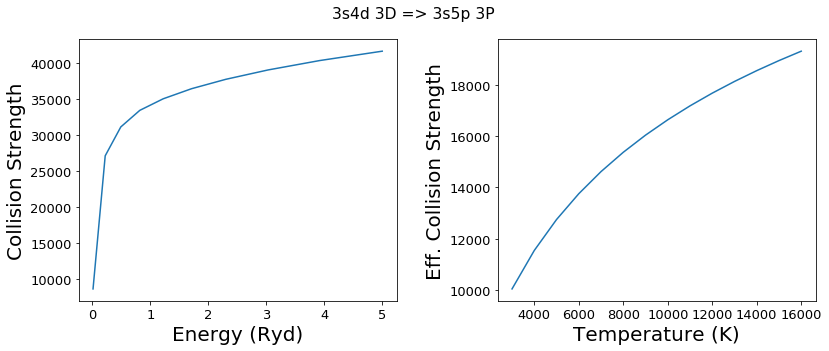

In [199]:
fig=plt.figure(figsize=(12,5))
ax1=plt.subplot(121)
plt.plot(ener,omg.loc[ihuge][3:-2])
ax2=plt.subplot(122)
plt.plot(T,ups.loc[ihuge][3:-1])
fig.suptitle('3s4d 3D => 3s5p 3P',y=1.01)
ax1.set_xlabel('Energy (Ryd)',fontsize=20)
ax1.set_ylabel('Collision Strength',fontsize=20)
ax2.set_xlabel('Temperature (K)',fontsize=20)
ax2.set_ylabel('Eff. Collision Strength',fontsize=20)
plt.tight_layout(pad=2.0)
plt.show()

In [215]:
ihuge=230

In [216]:
omg.loc[ihuge-1:ihuge+1]

,k,i,aki,0.01,0.22,0.489,0.817,1.22,1.71,2.3,3.03,3.92,5.0,inf,type
229,22,20,1.000000e-30,71.600,1.900,0.0799,0.01180,0.00367,0.00115,0.000397,0.000151,0.000061,0.000028,0.0,4
230,22,21,1.860000e+02,18900.000,71200.000,82600.0000,89300.00000,94800.00000,99900.00000,105000.000000,109000.000000,113000.000000,117000.000000,-8760.0,4
231,23,1,1.000000e-30,0.388,0.118,0.0236,0.00789,0.00322,0.00154,0.000789,0.000441,0.000250,0.000144,0.0,3


In [217]:
ups.loc[ihuge-1:ihuge+1]

,k,i,aki,3000.0,4000.0,5000.0,6000.0,7000.0,8000.0,9000.0,10000.0,11000.0,12000.0,13000.0,14000.0,15000.0,16000.0,inf
229,22,20,1.000000e-30,51.594203,48.815794,45.881221,43.098886,40.550531,38.244126,36.163215,34.284473,32.584178,31.040511,29.634208,28.348566,27.169217,26.083822,0.0
230,22,21,1.860000e+02,23513.520654,27598.506844,30915.368792,33701.154566,36097.971295,38197.846670,40063.806996,41740.896873,43262.412408,44653.648161,45934.261553,47119.825234,48222.880563,49253.672861,-8760.0
231,23,1,1.000000e-30,0.299891,0.303664,0.302456,0.298870,0.294081,0.288681,0.282996,0.277210,0.271435,0.265738,0.260159,0.254722,0.249441,0.244323,0.0


In [218]:
k_idx=int(omg.loc[ihuge]['k'])
i_idx=int(omg.loc[ihuge]['i'])
print(i_idx,"==>",k_idx)

21 ==> 22


In [219]:
mod_levels.loc[i_idx-1:k_idx-1]

,LevelNumber,ElectronConfig,Term,S,L,LevelWeight,ExcitationWaven
20,21,3s.5d,3D,3,2,15,0.519133
21,22,3s.6p,3P*,3,1,9,0.519578


In [220]:
1/abs(mod_levels.loc[i_idx-1]['ExcitationWaven']-mod_levels.loc[k_idx-1]['ExcitationWaven'])

2245.952926729265

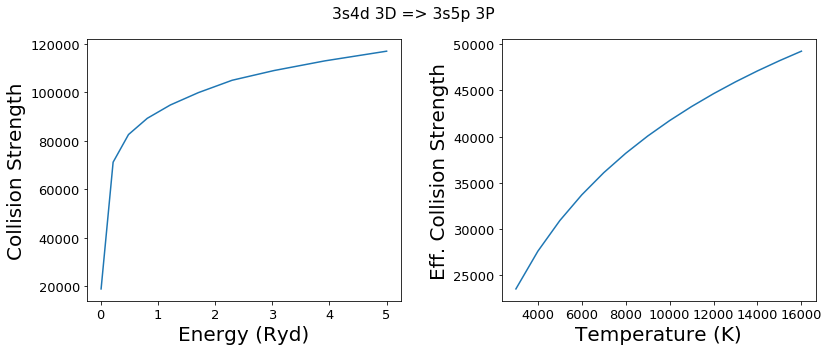

In [205]:
fig=plt.figure(figsize=(12,5))
ax1=plt.subplot(121)
plt.plot(ener,omg.loc[ihuge][3:-2])
ax2=plt.subplot(122)
plt.plot(T,ups.loc[ihuge][3:-1])
fig.suptitle('3s4d 3D => 3s5p 3P',y=1.01)
ax1.set_xlabel('Energy (Ryd)',fontsize=20)
ax1.set_ylabel('Collision Strength',fontsize=20)
ax2.set_xlabel('Temperature (K)',fontsize=20)
ax2.set_ylabel('Eff. Collision Strength',fontsize=20)
plt.tight_layout(pad=2.0)
plt.show()

In [221]:
ihuge=251

In [222]:
omg.loc[ihuge-1:ihuge+1]

,k,i,aki,0.01,0.22,0.489,0.817,1.22,1.71,2.3,3.03,3.92,5.0,inf,type
250,23,20,1.000000e-30,130.0,4.44,0.212,0.0426,0.0144,0.00571,0.00232,0.000948,0.0004,0.000177,0.0,4
251,23,21,1.080000e+04,14400.0,57000.00,71900.000,80600.0000,87700.0000,94100.00000,100000.00000,106000.000000,112000.0000,117000.000000,-11300.0,1
252,23,22,8.540000e-06,889.0,2220.00,2300.000,1790.0000,1310.0000,999.00000,823.00000,688.000000,581.0000,492.000000,2580.0,2


In [223]:
ups.loc[ihuge-1:ihuge+1]

,k,i,aki,3000.0,4000.0,5000.0,6000.0,7000.0,8000.0,9000.0,10000.0,11000.0,12000.0,13000.0,14000.0,15000.0,16000.0,inf
250,23,20,1.000000e-30,94.112335,89.824189,84.961743,80.203419,75.762599,71.691531,67.983410,64.610555,61.539543,58.737277,56.173295,53.820457,51.654955,49.656052,0.0
251,23,21,1.080000e+04,17697.576564,20591.087340,23004.901591,25082.726386,26910.985664,28546.107477,30027.109106,31382.133984,32632.156735,33793.226339,34877.894979,35896.165236,36856.138481,37764.470647,-11300.0
252,23,22,8.540000e-06,1043.793702,1196.669695,1311.336201,1401.174731,1473.852423,1534.109616,1585.048913,1628.791895,1666.840278,1700.287153,1729.946951,1756.438768,1780.241644,1801.732268,2580.0


In [224]:
k_idx=int(omg.loc[ihuge]['k'])
i_idx=int(omg.loc[ihuge]['i'])
print(i_idx,"==>",k_idx)

21 ==> 23


In [225]:
mod_levels.loc[i_idx-1:k_idx-1]

,LevelNumber,ElectronConfig,Term,S,L,LevelWeight,ExcitationWaven
20,21,3s.5d,3D,3,2,15,0.519133
21,22,3s.6p,3P*,3,1,9,0.519578
22,23,3s.5f,1F*,1,3,7,0.521283


In [226]:
1/abs(mod_levels.loc[i_idx-1]['ExcitationWaven']-mod_levels.loc[k_idx-1]['ExcitationWaven'])

465.09678102946066

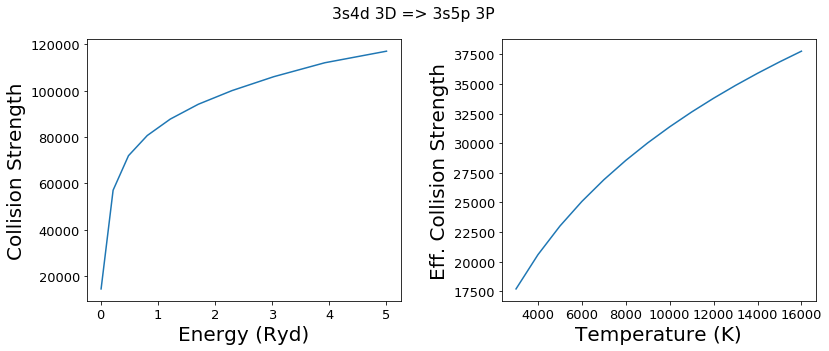

In [211]:
fig=plt.figure(figsize=(12,5))
ax1=plt.subplot(121)
plt.plot(ener,omg.loc[ihuge][3:-2])
ax2=plt.subplot(122)
plt.plot(T,ups.loc[ihuge][3:-1])
fig.suptitle('3s4d 3D => 3s5p 3P',y=1.01)
ax1.set_xlabel('Energy (Ryd)',fontsize=20)
ax1.set_ylabel('Collision Strength',fontsize=20)
ax2.set_xlabel('Temperature (K)',fontsize=20)
ax2.set_ylabel('Eff. Collision Strength',fontsize=20)
plt.tight_layout(pad=2.0)
plt.show()

In [245]:
omg.loc[omg['k'] == 65]

,k,i,aki,0.01,0.22,0.489,0.817,1.22,1.71,2.3,3.03,3.92,5.0,inf,type
2008,65,1,1.000000e-30,0.29700,0.1790,0.026900,0.012800,0.005220,0.002370,0.001140,0.000566,0.000289,0.000151,0.0000,3
2009,65,2,7.020000e+08,4.86000,39.6000,75.400000,112.000000,145.000000,174.000000,201.000000,226.000000,249.000000,272.000000,-89.4000,1
2010,65,3,1.000000e-30,1.45000,7.0700,3.880000,1.810000,0.822000,0.400000,0.214000,0.126000,0.077200,0.048200,0.0000,3
2011,65,5,1.000000e-30,0.05110,0.0918,0.002510,0.000955,0.000288,0.000106,0.000045,0.000021,0.000010,0.000005,0.0000,3
2012,65,6,1.000000e-30,7.35000,9.5700,1.660000,0.816000,0.312000,0.150000,0.080600,0.046100,0.027200,0.016400,0.0000,3
2013,65,7,3.330000e+05,7.50000,5.2700,5.160000,7.100000,6.600000,7.720000,8.310000,9.120000,9.870000,10.500000,-1.9700,4
2014,65,9,1.000000e-30,2.20000,0.9800,0.268000,0.126000,0.055000,0.026200,0.014000,0.008160,0.004990,0.003110,0.0000,3
2015,65,11,1.000000e-30,0.01850,0.1390,0.002270,0.000850,0.000244,0.000087,0.000036,0.000016,0.000008,0.000004,0.0000,3
2016,65,12,1.000000e-30,3.12000,8.4200,0.701000,0.340000,0.125000,0.058300,0.031000,0.017600,0.010300,0.006170,0.0000,3
2017,65,14,2.290000e+03,1.75000,1.1800,1.250000,1.460000,1.600000,1.770000,1.900000,2.020000,2.120000,2.200000,-0.2900,4


In [312]:
tlev = levels.copy()
rows1 = levels.loc[0:3]
rows2 = levels.loc[5:64]
rows3 = levels.loc[66:] 
tlev.drop(rows1.index, inplace=True)
tlev.drop(rows2.index, inplace=True)
tlev.drop(rows3.index, inplace=True)

In [313]:
tlev

,CFG,S,L,J,E
4,3S1 4S1,3,0,1.0,0.346630
65,3P2,3,1,4.0,0.514838
